# Group 5 - Final Report
### Noelani Roy, Yihong Qiu, Cosimo Cambi, Craig Perkins

In [25]:
#Libraries Imported
import pandas as pd
import numpy as np


### EDA - Data Loading

In [3]:
df_test=pd.read_csv(
    'fraudTest.csv')
df_train=pd.read_csv(
    'fraudTrain.csv')  

fraud_df= df_test.append(df_train)
fraud_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### EDA - Data Preprocessing

In [4]:
# Checking for missing values
fraud_df.isnull().any().sum()

0

In [5]:
fraud_df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [6]:
fraud_df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

### EDA - Column Exploration

Text(0, 0.5, 'Volume')

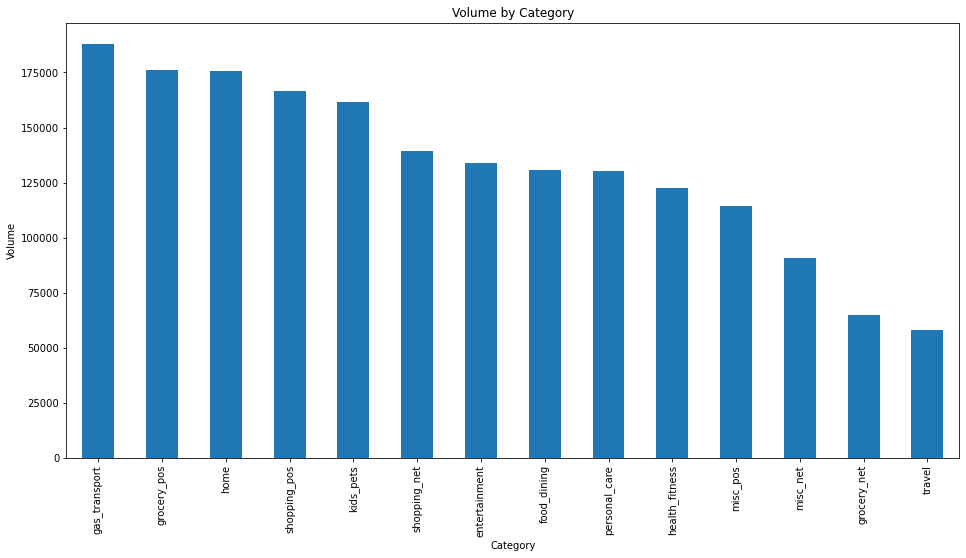

In [7]:
plt = pd.value_counts(fraud_df['category']).plot.bar(figsize=(16, 8), title="Volume by Category")
plt.set_xlabel('Category')
plt.set_ylabel('Volume')

Text(0, 0.5, 'Volume')

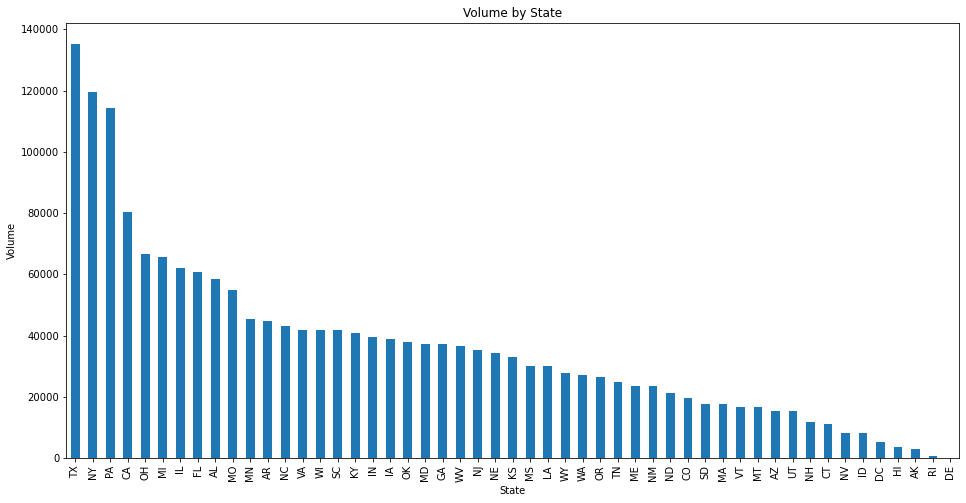

In [8]:
plt = pd.value_counts(fraud_df['state']).plot.bar(figsize=(16, 8), title="Volume by State")
plt.set_xlabel('State')
plt.set_ylabel('Volume')

Text(0, 0.5, 'Volume')

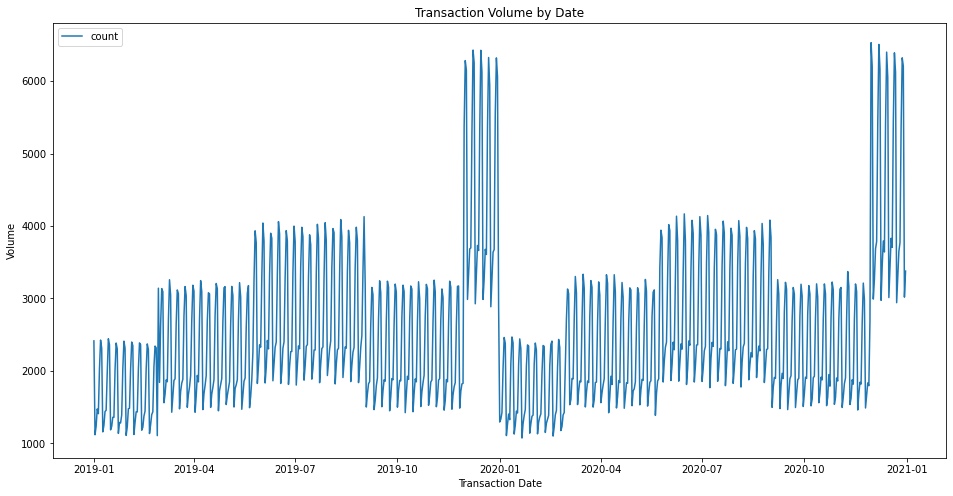

In [8]:
fraud_df['txn_datetime'] =  pd.to_datetime(fraud_df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')

fraud_df['date_of_birth'] =  pd.to_datetime(fraud_df['dob'], format='%Y-%m-%d')
fraud_df['year_of_birth'] = fraud_df['date_of_birth'].dt.year
fraud_df['date_of_birth'] = fraud_df['date_of_birth'].dt.date

fraud_df['txn_date'] = fraud_df['txn_datetime'].dt.date
txn_count_by_date = fraud_df['txn_date'].value_counts().sort_index().reset_index()
txn_count_by_date.columns = ['txn_date','count']
plt = txn_count_by_date.plot.line(x='txn_date', y='count', figsize=(16, 8), title="Transaction Volume by Date")
plt.set_xlabel('Transaction Date')
plt.set_ylabel('Volume')

Text(0, 0.5, 'Count')

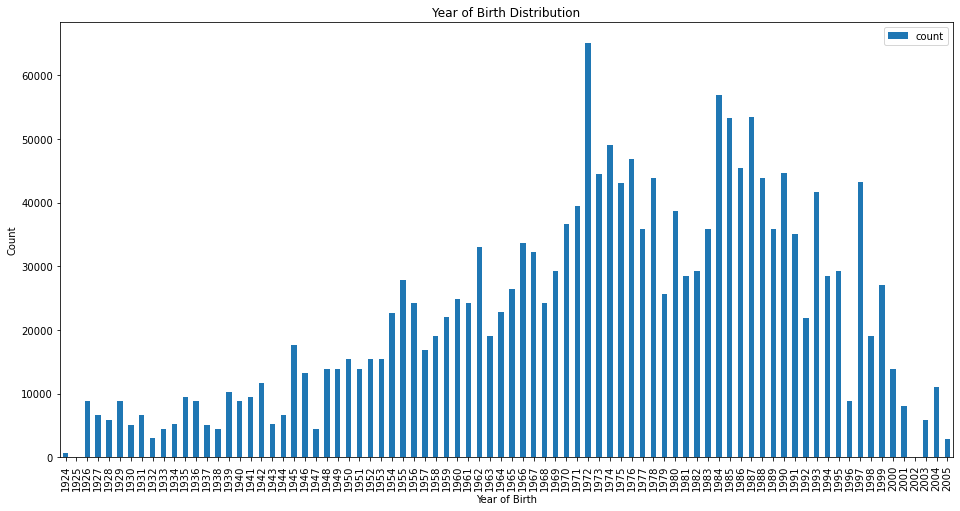

In [10]:
dob_counts = fraud_df['year_of_birth'].value_counts().sort_index().reset_index()
dob_counts.columns = ['year_of_birth','count']

plt = dob_counts.plot.bar(x='year_of_birth', y='count', figsize=(16, 8), title="Year of Birth Distribution")
plt.set_xlabel('Year of Birth')
plt.set_ylabel('Count')

In [11]:
# Number of merchants in the dataset

print(f"Number of merchants: {fraud_df['merchant'].nunique()}")

# Number of cards in the dataset

print(f"Number of cards: {fraud_df['cc_num'].nunique()}")

# Number of cards in the dataset

print(f"Number of unique users: {fraud_df.groupby(['first', 'last', 'gender', 'street', 'city']).ngroups}")


Number of merchants: 693
Number of cards: 999
Number of unique users: 999


Text(0, 0.5, 'Volume')

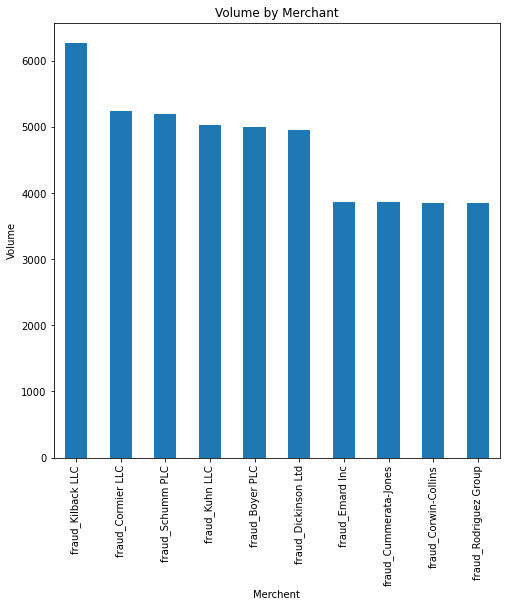

In [12]:
plt = pd.value_counts(fraud_df['merchant']).nlargest(10).plot.bar(figsize=(8, 8), title="Volume by Merchant")
plt.set_xlabel('Merchent')
plt.set_ylabel('Volume')

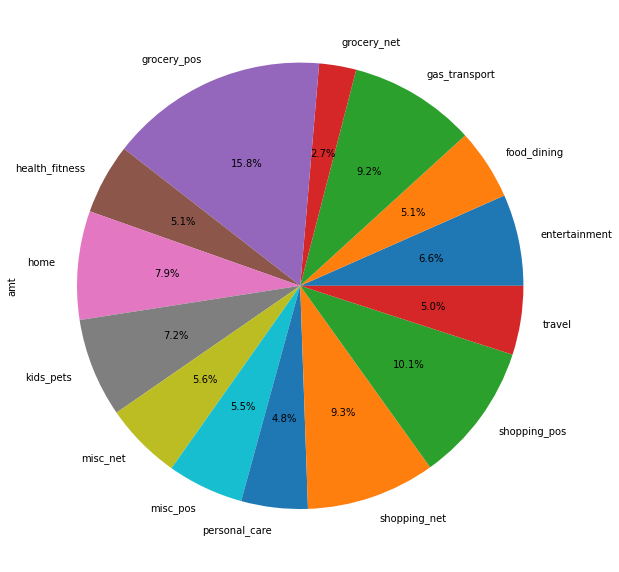

In [13]:
category_amt = fraud_df.groupby("category")["amt"].sum()
category_amt.plot.pie(autopct="%.1f%%", figsize=(10, 12))

### EDA - Special Features Engineering

In [4]:
from datetime import date
import geopy.distance

from math import sin, cos, sqrt, atan2, radians, log

#### Calculating Age from Date of Birth Column 

In [5]:
#Calculate Age
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

if 'dob' in fraud_df.columns:
    fraud_df['age'] = [calculate_age(d) for d in pd.to_datetime(fraud_df['dob'], format='%Y-%m-%d')]

#### Calculating Distance between card holder and merchant

In [6]:
def calculate_distance(row):
    coords_1 = (row['lat'], row['long'])
    coords_2 = (row['merch_lat'], row['merch_long'])
    return geopy.distance.geodesic(coords_1, coords_2).km

# Answer from https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
# The answers above are based on the Haversine formula, which assumes the earth is a sphere,
# which results in errors of up to about 0.5% (according to help(geopy.distance)). 
# Vincenty distance uses more accurate ellipsoidal models such as WGS-84, and is implemented in geopy. For example,
def calculate_distance2(row):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(row['lat'])
    lon1 = radians(row['long'])
    lat2 = radians(row['merch_lat'])
    lon2 = radians(row['merch_long'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    print(distance)
    
if set(['lat', 'long', 'merch_lat', 'merch_long']).issubset(set(fraud_df.columns)):
     fraud_df['distance'] = [calculate_distance(row) for _, row in fraud_df.iterrows()]

#### Separating Time Buckets from Datetime Column

In [9]:
fraud_df['hour'] = fraud_df['txn_datetime'].dt.hour
fraud_df['day'] = fraud_df['txn_datetime'].dt.day
fraud_df['month'] = fraud_df['txn_datetime'].dt.month
fraud_df['year'] = fraud_df['txn_datetime'].dt.year

#### Removing Columns used to derive new features

In [10]:
fraud_df.drop([
    'Unnamed: 0',
    'trans_num',
    'unix_time',
    'first',
    'last',
    'street',
    'city',
    'state',
    'zip',
    'dob',
    'trans_date_trans_time',
    'lat',
    'long',
    'merch_lat',
    'merch_long'
], axis=1, errors='ignore', inplace=True)

cols = list(fraud_df.columns)
cols.insert(0, cols.pop(cols.index("txn_datetime")))
cols.append(cols.pop(cols.index('is_fraud')))
fraud_df = fraud_df[cols]

fraud_df.head()

,txn_datetime,cc_num,merchant,category,amt,gender,city_pop,job,age,distance,date_of_birth,year_of_birth,txn_date,hour,day,month,year,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,333497,Mechanical engineer,52,24.613746,1968-03-19,1968,2020-06-21,12,21,6,2020,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,302,"Sales professional, IT",30,104.834043,1990-01-17,1990,2020-06-21,12,21,6,2020,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,34496,"Librarian, public",50,59.204796,1970-10-21,1970,2020-06-21,12,21,6,2020,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,54767,Set designer,33,27.615117,1987-07-25,1987,2020-06-21,12,21,6,2020,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,1126,Furniture designer,65,104.423175,1955-07-06,1955,2020-06-21,12,21,6,2020,0


### EDA - Outlier Detection

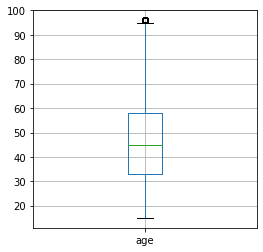

In [19]:
fraud_df.boxplot(column='age', figsize=(4, 4))

Transaction Amount:
count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64


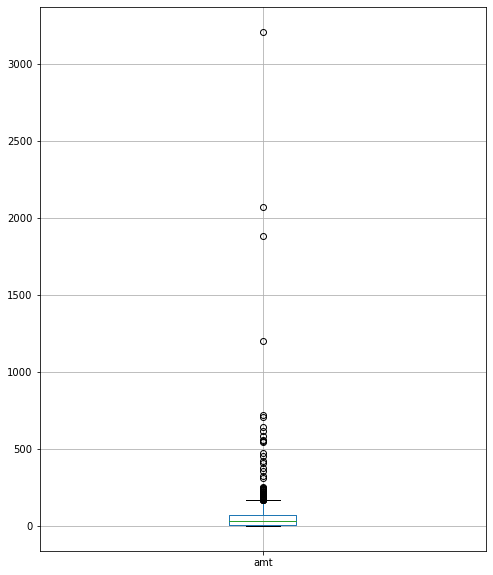

In [20]:
stats = fraud_df['amt'].describe()
print("Transaction Amount:")
print(stats)
fraud_df.head(1000).boxplot(column='amt', figsize=(8, 10))

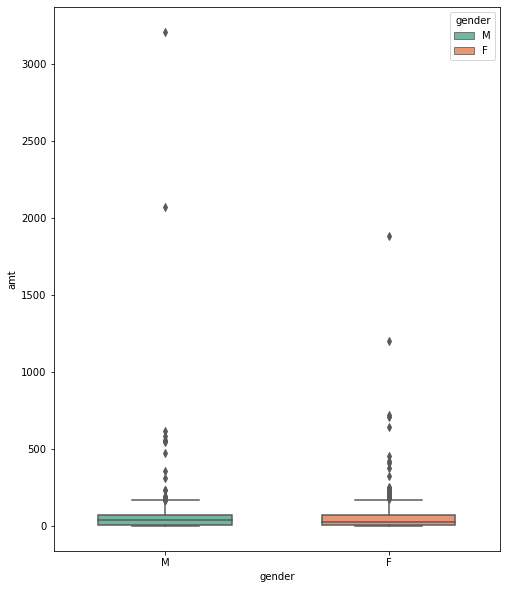

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
gender_amt = pd.DataFrame(fraud_df.head(1000), columns = ['amt', 'gender'])

plt.figure(figsize=(8,10))
sns.boxplot(y='amt', x='gender', data=gender_amt, hue='gender', dodge=False, width = 0.6, palette= 'Set2')

### EDA - Imbalance Identification

In [22]:
fraud_counts = fraud_df['is_fraud'].value_counts().sort_index().reset_index()
fraud_counts.columns = ['is_fraud','count']

# print(fraud_counts)

no_fraud_count = fraud_counts.loc[fraud_counts['is_fraud'] == 0].iloc[0]['count']
fraud_count = fraud_counts.loc[fraud_counts['is_fraud'] == 1].iloc[0]['count']

percent_with_fraud = "{:.2f}".format(((fraud_count / no_fraud_count) * 100))

print(f"No Fraud Count: {no_fraud_count}")
print(f"Fraud Count: {fraud_count}")
print(f"Fraud Percentage: {percent_with_fraud}%")

No Fraud Count: 1842743
Fraud Count: 9651
Fraud Percentage: 0.52%


### Data Encoding - One Hot Encoder

In [11]:
cat_col = ['category','gender']
fraud_df['Target'] = fraud_df['amt']
#This one hot encodes the categorical columns and create a new variable to hold the nex column headers
if len(cat_col)>0: 
    cat_onehotencode = pd.get_dummies(fraud_df[cat_col],drop_first = True)
    cat_col_onehotencode = list(cat_onehotencode.columns)
    fraud_df = pd.concat([fraud_df,cat_onehotencode], axis = 1)

else:
    cat_col_onehotencode = []
fraud_df[cat_col_onehotencode].head()

<ipython-input-11-0a7290052b9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['Target'] = fraud_df['amt']


,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [121]:
fraud_df.to_csv('df_cat.csv', index=False)

In [1]:
import pandas as pd
df=pd.read_csv(
    'df_cat.csv')
df.head(10)

,txn_datetime,cc_num,merchant,category,amt,gender,city_pop,job,age,distance,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,333497,Mechanical engineer,52,24.613746,...,0,0,0,0,0,1,0,0,0,1
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,302,"Sales professional, IT",30,104.834043,...,0,0,0,0,0,1,0,0,0,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,34496,"Librarian, public",50,59.204796,...,1,0,0,0,0,0,0,0,0,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,54767,Set designer,33,27.615117,...,0,0,0,0,1,0,0,0,0,1
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,1126,Furniture designer,65,104.423175,...,0,0,0,0,0,0,0,0,1,1
5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,F,520,Psychotherapist,29,86.045959,...,0,0,1,0,0,0,0,0,0,0
6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,F,1139,"Therapist, occupational",69,134.408462,...,1,0,0,0,0,0,0,0,0,0
7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,F,343,"Development worker, international aid",48,82.907939,...,0,0,0,0,0,1,0,0,0,0
8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,M,3688,Advice worker,47,61.401541,...,0,0,0,0,0,0,0,1,0,1
9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,F,263,Barrister,64,44.193728,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.drop([
    'cc_num',
    'merchant',
    'category',
    # 'amt',
    'last',
    # 'city_pop',
    'job',
    'date_of_birth',
    'year_of_birth',
    'gender',
    'txn_datetime',
    'txn_date',
    # 'distance',
    'Target',
    # 'age'
], axis=1, errors='ignore', inplace=True)
df.head()

,amt,city_pop,age,distance,hour,day,month,year,is_fraud,category_food_dining,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2.86,333497,52,24.613746,12,21,6,2020,0,0,...,0,0,0,0,0,1,0,0,0,1
1,29.84,302,30,104.834043,12,21,6,2020,0,0,...,0,0,0,0,0,1,0,0,0,0
2,41.28,34496,50,59.204796,12,21,6,2020,0,0,...,1,0,0,0,0,0,0,0,0,0
3,60.05,54767,33,27.615117,12,21,6,2020,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3.19,1126,65,104.423175,12,21,6,2020,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
df.nunique()

In [ ]:
df.sum

In [3]:
#Breaking it into two parts, separate the target variable from the other columns
X = df.drop('is_fraud',axis=1).copy()
X.head()

,amt,city_pop,age,distance,hour,day,month,year,category_food_dining,category_gas_transport,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2.86,333497,52,24.613746,12,21,6,2020,0,0,...,0,0,0,0,0,1,0,0,0,1
1,29.84,302,30,104.834043,12,21,6,2020,0,0,...,0,0,0,0,0,1,0,0,0,0
2,41.28,34496,50,59.204796,12,21,6,2020,0,0,...,1,0,0,0,0,0,0,0,0,0
3,60.05,54767,33,27.615117,12,21,6,2020,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3.19,1126,65,104.423175,12,21,6,2020,0,0,...,0,0,0,0,0,0,0,0,1,1


In [4]:
y = df['is_fraud'].copy()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3 , stratify=y)

In [27]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 

from imblearn.under_sampling import RandomUnderSampler

us = RandomUnderSampler(sampling_strategy = 0.1)
  
X_train, y_train = us.fit_sample(X_train, y_train.ravel()) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train == 0))) 

Before Undersampling, counts of label '1': 6756
Before Undersampling, counts of label '0': 1289919 

After Undersampling, the shape of train_X: (74316, 22)
After Undersampling, the shape of train_y: (74316,) 

After Undersampling, counts of label '1': 6756
After Undersampling, counts of label '0': 67560


In [18]:
sum(y_train)/len(y_train)

0.00520948612333256

In [19]:
sum(y_test)/len(y_test)

0.0052100734484795954

In [114]:
# print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
# print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# # apply near miss 
# from imblearn.under_sampling import NearMiss 
# nr = NearMiss() 

# from imblearn.under_sampling import RandomUnderSampler

# us = RandomUnderSampler(sampling_strategy = 0.1)
  
# X_train, y_train = us.fit_sample(X_train, y_train.ravel()) 
# X_test, y_test = us.fit_sample(X_test, y_test.ravel()) 
  
# print('After Undersampling, the shape of train_X: {}'.format(X_train.shape)) 
# print('After Undersampling, the shape of train_y: {} \n'.format(y_train.shape)) 
  
# print("After Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
# print("After Undersampling, counts of label '0': {}".format(sum(y_train == 0))) 

Before Undersampling, counts of label '1': 965
Before Undersampling, counts of label '0': 184274 

After Undersampling, the shape of train_X: (10615, 22)
After Undersampling, the shape of train_y: (10615,) 

After Undersampling, counts of label '1': 965
After Undersampling, counts of label '0': 9650


In [ ]:
df.nunique()

In [128]:
X_train.head(100)

,amt,city_pop,age,distance,hour,day,month,year,category_food_dining,category_gas_transport,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
22633,141.63,1383,54,50.246112,2,26,4,2019,0,0,...,0,0,0,0,0,0,0,0,0,1
62587,2.51,1089,49,89.932368,15,22,9,2020,0,0,...,0,0,1,0,0,0,0,0,0,0
73803,110.23,128,74,91.108794,9,31,10,2020,0,1,...,0,0,0,0,0,0,0,0,0,1
72530,8.19,223,81,46.373169,8,12,9,2019,0,0,...,0,0,0,1,0,0,0,0,0,1
75703,8.95,54767,33,28.472157,21,27,7,2020,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100462,1102.19,459921,60,64.406470,23,26,4,2019,0,0,...,0,0,0,0,0,0,0,1,0,0
88164,39.53,2368,31,78.592408,20,28,12,2019,0,0,...,0,0,1,0,0,0,0,0,0,0
17784,50.08,2607,25,11.527957,20,23,11,2020,0,0,...,0,0,1,0,0,0,0,0,0,0
99190,1000.90,1946,30,60.768023,14,2,2,2019,0,0,...,0,0,0,0,0,0,1,0,0,1


# Scaling for Linear Regression

In [28]:
# Scale the DataFrame using MinMaxScaler

import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x = X_train.values
x_scaled = min_max_scaler.fit_transform(x)
X_train_scaled = pd.DataFrame(x_scaled)
X_train_scaled.columns = X_train.columns

x = X_test.values
x_scaled = min_max_scaler.fit_transform(x)
X_test_scaled = pd.DataFrame(x_scaled)
X_test_scaled.columns = X_test.columns

In [130]:
X_train_scaled.head()

,amt,city_pop,age,distance,hour,day,month,year,category_food_dining,category_gas_transport,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0.031847,0.000468,0.481481,0.341817,0.086957,0.833333,0.272727,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000340,0.000367,0.419753,0.613576,0.652174,0.700000,0.727273,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.024736,0.000036,0.728395,0.621632,0.391304,1.000000,0.818182,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.001626,0.000069,0.814815,0.315296,0.347826,0.366667,0.727273,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.001798,0.018834,0.222222,0.192715,0.913043,0.866667,0.545455,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Analyzing features for Collinearity

## Correlation Matrix

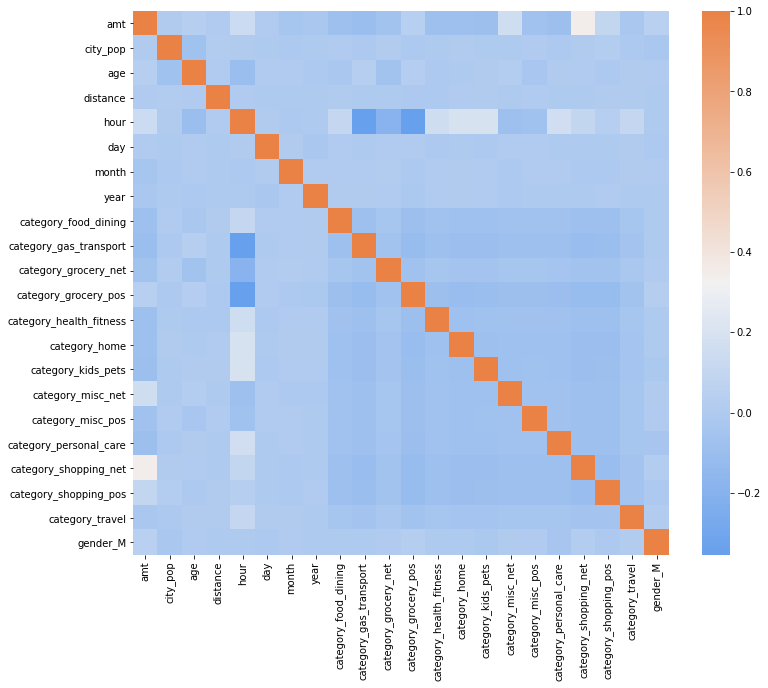

In [9]:
# Correlation Matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(250, 30, s=80, l=65, as_cmap=True)
sns.heatmap(X_train_scaled.corr(), cmap=cmap)
plt.show()

## Variance Inflation Factor

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif_test = add_constant(X_train_scaled)
vif_series = pd.Series([variance_inflation_factor(vif_test.values, i) 
               for i in range(vif_test.shape[1])], 
              index=vif_test.columns)

print(vif_series)

const                      45.911052
amt                         1.181387
city_pop                    1.007797
age                         1.052235
distance                    1.002174
hour                        1.949698
day                         1.001698
month                       1.005640
year                        1.002418
category_food_dining        1.853510
category_gas_transport      2.658052
category_grocery_net        1.610829
category_grocery_pos        2.758495
category_health_fitness     1.876253
category_home               2.162549
category_kids_pets          2.089133
category_misc_net           1.875499
category_misc_pos           1.821684
category_personal_care      1.940198
category_shopping_net       2.253438
category_shopping_pos       2.286694
category_travel             1.413443
gender_M                    1.006331
dtype: float64


## Linear Regression

For our dataset we are predicting fraud, so to use Linear Regression we will use the amt as the Target variable to see if there is a linear relationship between the rest of our features in the feature set and the amt.

In [29]:
linear_columns = [col for col in X_train_scaled.columns if col not in ['amt']]

amt = X_train_scaled['amt']
X_train_linear = X_train_scaled[linear_columns]

In [44]:
X_train_linear.head()

,city_pop,age,distance,hour,day,month,year,category_food_dining,category_gas_transport,category_grocery_net,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,0.001260,0.358025,0.721539,0.739130,0.300000,0.636364,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000174,0.197531,0.364206,0.521739,0.466667,0.181818,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.005108,0.382716,0.438367,1.000000,0.066667,0.818182,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.000482,0.086420,0.719902,1.000000,0.733333,0.909091,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001555,0.086420,0.687888,0.826087,0.166667,0.090909,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Use statsmodels to get predictive statistics

import statsmodels.api as sm

X_train_linear = sm.add_constant(X_train_linear)
model = sm.OLS(amt, X_train_linear)
results = model.fit()
print(results.summary())
# print(results.pvalues)
# print(results.resid)

                            OLS Regression Results                            
Dep. Variable:                    amt   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     523.2
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        09:46:50   Log-Likelihood:             1.9876e+05
No. Observations:               74316   AIC:                        -3.975e+05
Df Residuals:                   74294   BIC:                        -3.973e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

You can see from the OLS Regression that 4 categories have the highest coefficients when predicting the amt of the transaction. Those categories are `category_shopping_net` (Coeff: 0.0509), `category_misc_net` (Coeff: 0.0434), `hour` (Coeff: 0.042) and `category_grocery_pos` (Coeff: 0.0346). This model does not have a high R Squared value (0.327) so the linear model is a pretty weak fit for the data.

# Logistic Regression

<ipython-input-31-e03a80bf8a31>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_amt['is_fraud'] = y_train


Text(0.5, 1.0, 'amt vs probability of fraud trainng dataset')

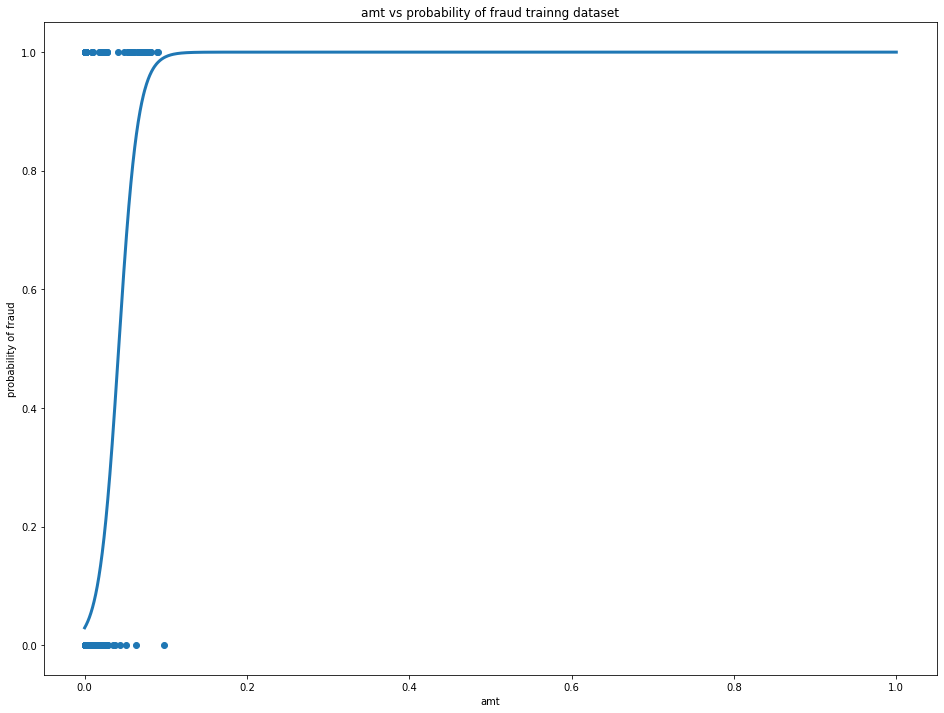

In [31]:
# This is a Bivariate regression of scaled amt vs probability of fraud done for visualization purposes
# and to illustrate the effect of tuning the parameters of the model. See the cell below for a multi-variate
# analysis

from sklearn import datasets, linear_model

X_amt = X_train_scaled[['amt']]

X_amt['is_fraud'] = y_train

X_amt = X_amt.sort_values('amt')
X_amt_sample = X_amt.sample(1000)
y_amt = X_amt['is_fraud'].ravel()
X_amt = X_amt[['amt']]

model1 = linear_model.LogisticRegression(solver='liblinear', random_state=0, C=100.0)

model1.fit(X_amt, y_amt)

X_test_amt = X_test_scaled[['amt']]
X_test_amt = X_test_amt.sort_values('amt')

X_amt_sample = X_amt_sample.sort_values('amt')
y_amt_sample = X_amt_sample['is_fraud'].ravel()
X_amt_sample = X_amt_sample[['amt']]

plt.figure(figsize=(16, 12))
plt.scatter(X_amt_sample, y_amt_sample)
plt.plot(X_test_amt, model1.predict_proba(X_test_amt)[:, 1], linewidth=3)
plt.xlabel('amt')
plt.ylabel('probability of fraud')
plt.title('amt vs probability of fraud trainng dataset')

Text(0.5, 1.0, 'amt vs probability of fraud test dataset')

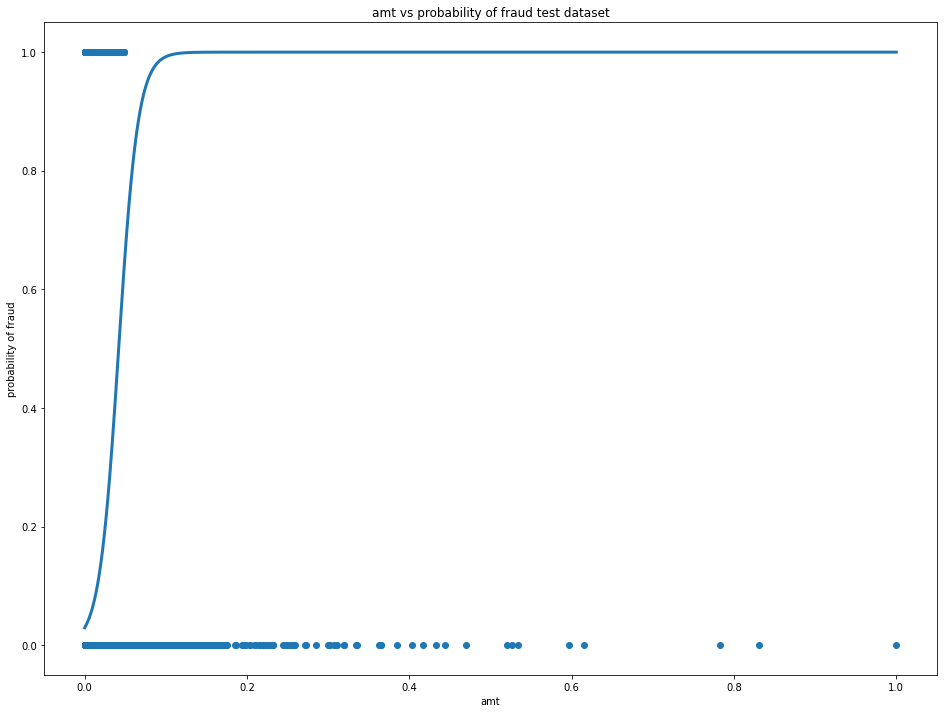

In [32]:
plt.figure(figsize=(16, 12))
plt.scatter(X_test_scaled[['amt']], y_test)
plt.plot(X_test_amt, model1.predict_proba(X_test_amt)[:, 1], linewidth=3)
plt.xlabel('amt')
plt.ylabel('probability of fraud')
plt.title('amt vs probability of fraud test dataset')

Accuracy: 0.9931008297358918


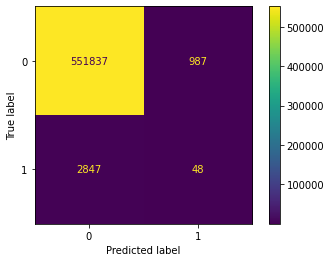

In [48]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

print(f"Accuracy: {accuracy_score(y_test, model1.predict(X_test_scaled[['amt']]))}")

plot_confusion_matrix(model1, X_test_scaled[['amt']], y_test)  # doctest: +SKIP
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score

# y_true = [2, 0, 2, 2, 0, 1]
# y_pred = [0, 0, 2, 2, 0, 2]
# confusion_matrix(y_true, y_pred)

print(confusion_matrix(y_test, model1.predict(X_test_scaled[['amt']])))
print(accuracy_score(y_test, model1.predict(X_test_scaled[['amt']])))

[[551837    987]
 [  2847     48]]
0.9931008297358918


In [50]:
from sklearn import linear_model

model2 = linear_model.LogisticRegression(solver='liblinear', random_state=0)

model2.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, model2.predict(X_test_scaled)))
print(accuracy_score(y_test, model2.predict(X_test_scaled)))

[[552383    441]
 [  2831     64]]
0.9941121322107036


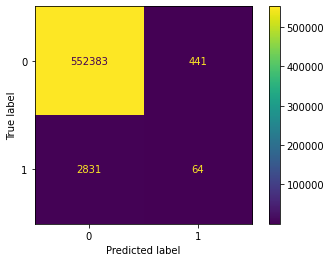

In [49]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model2, X_test_scaled, y_test)  # doctest: +SKIP
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid = {
    "C": np.logspace(-3, 3, 7, 20, 30),
    "solver": ["liblinear", "saga"],
    "penalty": [
        "l1", # l1 lasso
        "l2", # l2 ridge
        "elasticnet"
    ]
}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train_scaled, y_train)

/Users/perkinsc/Documents/Northeastern/EAI6000/eai6000_group5/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/perkinsc/Documents/Northeastern/EAI6000/eai6000_group5/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/perkinsc/Documents/Northeastern/EAI6000/eai6000_group5/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/perkinsc/Documents/Northeastern/EAI6000/eai6000_group5/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 's

/Users/perkinsc/Documents/Northeastern/EAI6000/eai6000_group5/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/perkinsc/Documents/Northeastern/EAI6000/eai6000_group5/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/perkinsc/Documents/Northeastern/EAI6000/eai6000_group5/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/perkinsc/Documents/Northeastern/EAI6000/eai6000_group5/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 's

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([3.70370370e-05, 1.11111111e-03, 3.33333333e-02, 1.00000000e+00,
       3.00000000e+01, 9.00000000e+02, 2.70000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']})

In [39]:
logreg_cv.best_params_

{'C': 30.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [42]:
np.set_printoptions(suppress=True)

logreg_cv.best_estimator_.coef_

array([[99.81150745, -0.17186938,  0.32794654, -0.03026317,  1.19053233,
        -0.01242672, -0.76242091, -0.14838823,  0.31628327,  1.83534711,
         1.45801542,  2.07151359,  0.16084281,  0.0335916 ,  0.34621341,
         0.12007021,  0.40425577,  0.61726083, -0.85590992, -0.9301223 ,
        -0.40427121, -0.02969549]])

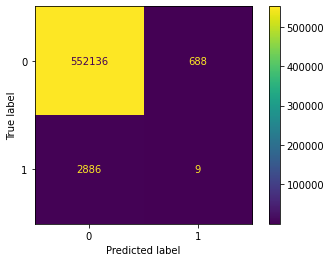

In [43]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg_cv.best_estimator_, X_test_scaled, y_test)  # doctest: +SKIP
plt.show()

In [277]:
logreg_cv.best_estimator_

LogisticRegression(C=30.0, penalty='l1', solver='liblinear')

In [53]:
print("accuracy:", logreg_cv.best_score_)

accuracy : 0.9515582396439782


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, logreg_cv.best_estimator_.predict(X_test_scaled)))
print(accuracy_score(y_test, logreg_cv.best_estimator_.predict(X_test_scaled)))

[[552136    688]
 [  2886      9]]
0.9935686920907869


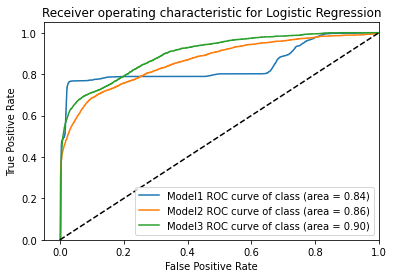

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_score = model1.predict_proba(X_test_scaled[['amt']])
y_score2 = model2.predict_proba(X_test_scaled)
y_score3 = logreg_cv.best_estimator_.predict_proba(X_test_scaled)

fpr = []
tpr = []
roc_auc = []
fpr, tpr, _ = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)

fpr2, tpr2, _ = roc_curve(y_test, y_score2[:,1])
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, _ = roc_curve(y_test, y_score3[:,1])
roc_auc3 = auc(fpr3, tpr3)

plt.plot(fpr, tpr, label=f"Model1 ROC curve of class (area = {roc_auc:.2f})")
plt.plot(fpr2, tpr2, label=f"Model2 ROC curve of class (area = {roc_auc2:.2f})")
plt.plot(fpr3, tpr3, label=f"Model3 ROC curve of class (area = {roc_auc3:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machines

In [55]:
# It recommended to standardize inputs for SVMs

# Scale the DataFrame using MinMaxScaler

import pandas as pd
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
x = X_train.values
x_scaled = standard_scaler.fit_transform(x)
X_train_standardized = pd.DataFrame(x_scaled)
X_train_standardized.columns = X_train.columns

x = X_test.values
x_scaled = standard_scaler.fit_transform(x)
X_test_standardized = pd.DataFrame(x_scaled)
X_test_standardized.columns = X_test.columns

In [56]:
from sklearn import svm

clf = svm.SVC(probability=True)
clf.fit(X_train_standardized, y_train)

SVC(probability=True)

Accuracy: 0.9761714103710688


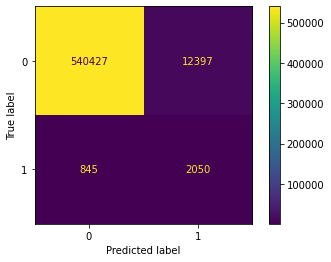

In [57]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

print(f"Accuracy: {accuracy_score(y_test, clf.predict(X_test_standardized))}")
plot_confusion_matrix(clf, X_test_standardized, y_test)  # doctest: +SKIP
plt.show()

In [58]:
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

param_grid = {
    'C': [
        1,
        10,
#         100
    ],  
#     'gamma': [
#         1,
#         0.1,
#         0.01
#     ], 
    'kernel': ['rbf']
}

svc_cv = GridSearchCV(svm.SVC(probability=True), param_grid, cv=10)
svc_cv.fit(X_train_standardized, y_train)

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [1, 10], 'kernel': ['rbf']})

Accuracy: 0.9761714103710688


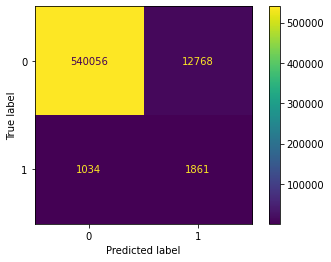

In [59]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

print(f"Accuracy: {accuracy_score(y_test, clf.predict(X_test_standardized))}")
plot_confusion_matrix(svc_cv.best_estimator_, X_test_standardized, y_test)  # doctest: +SKIP
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_score = clf.predict_proba(X_test_standardized)
y_score2 = svc_cv.best_estimator_.predict_proba(X_test_standardized)

fpr = []
tpr = []
roc_auc = []
fpr, tpr, _ = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr, tpr)

fpr2, tpr2, _ = roc_curve(y_test, y_score2[:,1])
roc_auc2 = auc(fpr2, tpr2)


plt.plot(fpr, tpr, label=f"Model1 ROC curve of class (area = {roc_auc:.2f})")
plt.plot(fpr2, tpr2, label=f"Model2 ROC curve of class (area = {roc_auc2:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Support Vector Machines')
plt.legend(loc="lower right")
plt.show()